In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np



In [2]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()

In [3]:
print("X_train shape : ", X_train.shape);print('X_test shape: ',X_test.shape);print('y_train shape: ',y_train.shape);print('y_test shape: ',y_test.shape)

X_train shape :  (50000, 32, 32, 3)
X_test shape:  (10000, 32, 32, 3)
y_train shape:  (50000, 1)
y_test shape:  (10000, 1)


In [4]:
# change array shape as row vector shape
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
print('Reshaped y_train: ',y_train[:10])
print('Reshaped y_test: ',y_test[:10])


Reshaped y_train:  [6 9 9 4 1 1 2 7 8 3]
Reshaped y_test:  [3 8 8 0 6 6 1 6 3 1]


In [5]:
# target classes
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [6]:
def plot_sample(X,y, index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

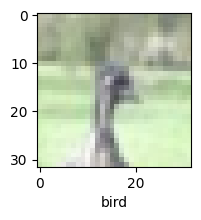

In [7]:
plot_sample(X_train,y_train, 48)

In [8]:
# max scalling data
X_train = X_train / 255
X_test = X_test / 255

In [9]:
cnn = models.Sequential([
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

In [10]:
cnn.compile(optimizer = 'adam',
loss = 'sparse_categorical_crossentropy',
metrics = ['accuracy'])

In [11]:
cnn.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 82s 51ms/step - loss: 1.4605 - accuracy: 0.4748
Epoch 2/10
1563/1563 [==============================] - 77s 49ms/step - loss: 1.1188 - accuracy: 0.6093
Epoch 3/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.9977 - accuracy: 0.6527
Epoch 4/10
1563/1563 [==============================] - 78s 50ms/step - loss: 0.9147 - accuracy: 0.6810
Epoch 5/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.8576 - accuracy: 0.7027
Epoch 6/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.8017 - accuracy: 0.7211
Epoch 7/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.7583 - accuracy: 0.7395
Epoch 8/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.7188 - accuracy: 0.7506
Epoch 9/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.6843 - accuracy: 0.7628
Epoch 10/10
1563/1563 [==============================] - 80s 51m

In [12]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 9s 27ms/step - loss: 0.9442 - accuracy: 0.6918


[0.9442173838615417, 0.6917999982833862]

In [13]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 4s 13ms/step


array([[8.6233541e-03, 2.6965037e-04, 8.5377879e-03, 8.8512611e-01,
        6.9251815e-05, 4.1496508e-02, 2.5920821e-03, 3.0713444e-04,
        5.1662613e-02, 1.3153050e-03],
       [1.9043535e-02, 6.4221233e-01, 2.7364966e-05, 1.0278449e-06,
        1.1513708e-06, 6.0274354e-09, 1.8295934e-08, 3.0189359e-08,
        3.3853510e-01, 1.7948085e-04],
       [4.1546151e-02, 1.2576337e-01, 9.3234340e-03, 3.9866399e-03,
        3.1931710e-03, 2.2532820e-04, 2.0217620e-04, 1.8283083e-04,
        8.0024761e-01, 1.5329297e-02],
       [8.1473482e-01, 1.1990797e-02, 2.8428293e-03, 3.5223188e-03,
        4.5639608e-02, 1.0766957e-04, 3.0081105e-04, 4.3540374e-05,
        1.2054620e-01, 2.7145111e-04],
       [1.1886115e-05, 3.0998850e-05, 8.1297293e-02, 2.4354577e-02,
        1.7704774e-01, 1.8776620e-03, 7.1531469e-01, 3.0956071e-05,
        7.5413741e-06, 2.6730248e-05]], dtype=float32)

In [14]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 1, 8, 0, 6]

In [15]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [16]:
cnn.save("MyClass.h5")

In [17]:
loaded_model = load_model('MyClass.h5')

Enter file name: dog.jpeg
1/1 [==============================] - 0s 25ms/step


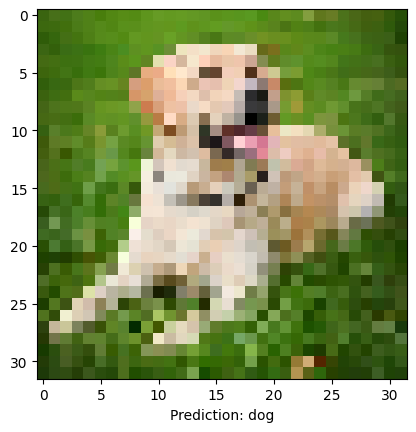

In [20]:
def predict_on_image(model, image_path):
    img = image.load_img(image_path, target_size=(32, 32, 3))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0

    # Make prediction
    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    predicted_class = classes[predicted_class_index]

    # Display the result
    plt.imshow(img)
    plt.xlabel(f'Prediction: {predicted_class}')
    plt.show()

# Example usage:
new_image_path = input("Enter file name: ")
predict_on_image(loaded_model,new_image_path)